<a href="https://colab.research.google.com/github/2022Group3/projectCode/blob/main/improve_model_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from matplotlib import pyplot
# from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load train and test dataset
def extract_zip():
	# load dataset
  myfile=np.load(r"drive/MyDrive/data_modified.npz")
  data_npz = dict(zip(("{}".format(k) for k in myfile), (myfile[k] for k in myfile)))
	# one hot encode target values
	# trainY = to_categorical(trainY)
	# testY = to_categorical(testY)
  return data_npz['train'], data_npz['ytrain'], data_npz['validation'], data_npz['yvalidation'], data_npz['test'], data_npz['ytest']

In [3]:
def load_dataset():
  trainX, trainY, validationX, vlidationY, testX, testY = extract_zip()
  return trainX, to_categorical(trainY), validationX, to_categorical(vlidationY), testX, to_categorical(testY)




In [4]:
trainX, trainY, validationX, vlidationY, testX, testY = load_dataset()
# print(f'trainx= {trainX} , trainy= {trainY}')


In [5]:
# scale pixels
def prep_pixels(train, validation, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	validation_norm = validation.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	validation_norm = validation_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm,validation_norm, test_norm


In [13]:
# define cnn model
# VGG with 1 block

def define_model1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(16, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='validation')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

In [10]:
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model1()
 	# prepare iterator
	datagen = ImageDataGenerator()
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] /256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Epoch 1/100
175/175 [==============================] - 5s 18ms/step - loss: 2.3975 - accuracy: 0.2311 - val_loss: 2.1868 - val_accuracy: 0.3076
Epoch 2/100
175/175 [==============================] - 3s 16ms/step - loss: 2.1286 - accuracy: 0.3233 - val_loss: 2.0355 - val_accuracy: 0.3484
Epoch 3/100
175/175 [==============================] - 3s 15ms/step - loss: 2.0034 - accuracy: 0.3625 - val_loss: 1.9478 - val_accuracy: 0.3803
Epoch 4/100
175/175 [==============================] - 3s 16ms/step - loss: 1.9156 - accuracy: 0.3868 - val_loss: 1.8589 - val_accuracy: 0.3981
Epoch 5/100
175/175 [==============================] - 3s 16ms/step - loss: 1.8363 - accuracy: 0.4080 - val_loss: 1.7954 - val_accuracy: 0.4139
Epoch 6/100
175/175 [==============================] - 3s 15ms/step - loss: 1.7634 - accuracy: 0.4316 - val_loss: 1.7283 - val_accuracy: 0.4427
Epoch 7/100
175/175 [==============================] - 3s 15ms/step - loss: 1.7024 - accuracy: 0.4493 - val_loss: 1.6757 - val_accuracy:

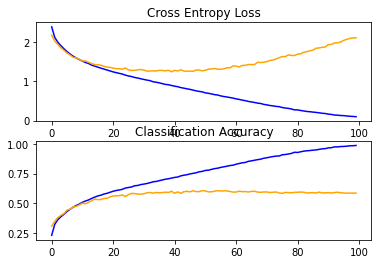

In [14]:
# entry point, run the test harness
run_test_harness()

In [15]:
# VGG with 2 blocks
def define_model2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(16, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [16]:
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model2()
 	# prepare iterator
	datagen = ImageDataGenerator()
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] /256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Epoch 1/100
175/175 [==============================] - 5s 25ms/step - loss: 2.4035 - accuracy: 0.2219 - val_loss: 2.1582 - val_accuracy: 0.3124
Epoch 2/100
175/175 [==============================] - 4s 22ms/step - loss: 2.0724 - accuracy: 0.3345 - val_loss: 1.9572 - val_accuracy: 0.3680
Epoch 3/100
175/175 [==============================] - 4s 23ms/step - loss: 1.8807 - accuracy: 0.3921 - val_loss: 1.7753 - val_accuracy: 0.4247
Epoch 4/100
175/175 [==============================] - 4s 23ms/step - loss: 1.7625 - accuracy: 0.4282 - val_loss: 1.7259 - val_accuracy: 0.4327
Epoch 5/100
175/175 [==============================] - 4s 22ms/step - loss: 1.6687 - accuracy: 0.4574 - val_loss: 1.6333 - val_accuracy: 0.4720
Epoch 6/100
175/175 [==============================] - 4s 24ms/step - loss: 1.6101 - accuracy: 0.4778 - val_loss: 1.5743 - val_accuracy: 0.4907
Epoch 7/100
175/175 [==============================] - 4s 25ms/step - loss: 1.5613 - accuracy: 0.4938 - val_loss: 1.5386 - val_accuracy:

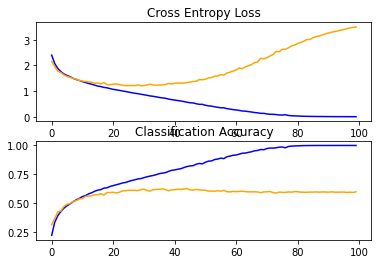

In [17]:
# entry point, run the test harness
run_test_harness()

In [18]:
# VGG with 3 blocks

# define cnn model
def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(16, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [19]:
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model3()
 	# prepare iterator
	datagen = ImageDataGenerator()
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] /256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Epoch 1/100
175/175 [==============================] - 7s 33ms/step - loss: 2.4292 - accuracy: 0.2069 - val_loss: 2.1816 - val_accuracy: 0.2980
Epoch 2/100
175/175 [==============================] - 5s 27ms/step - loss: 2.0819 - accuracy: 0.3253 - val_loss: 2.0358 - val_accuracy: 0.3411
Epoch 3/100
175/175 [==============================] - 5s 26ms/step - loss: 1.9053 - accuracy: 0.3792 - val_loss: 1.8762 - val_accuracy: 0.3856
Epoch 4/100
175/175 [==============================] - 5s 27ms/step - loss: 1.8097 - accuracy: 0.4080 - val_loss: 1.7379 - val_accuracy: 0.4219
Epoch 5/100
175/175 [==============================] - 5s 27ms/step - loss: 1.7212 - accuracy: 0.4395 - val_loss: 1.6695 - val_accuracy: 0.4451
Epoch 6/100
175/175 [==============================] - 5s 28ms/step - loss: 1.6497 - accuracy: 0.4595 - val_loss: 1.6016 - val_accuracy: 0.4735
Epoch 7/100
175/175 [==============================] - 5s 29ms/step - loss: 1.5922 - accuracy: 0.4815 - val_loss: 1.5732 - val_accuracy:

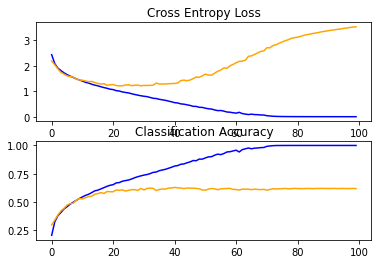

In [20]:
# entry point, run the test harness
run_test_harness()

In [ ]:
# overfitting. try dropout

In [21]:
# define cnn model
def define_model_with_drop_out():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(16, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [22]:
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model_with_drop_out()
 	# prepare iterator
	datagen = ImageDataGenerator()
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] /256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Epoch 1/100
175/175 [==============================] - 6s 29ms/step - loss: 2.7593 - accuracy: 0.0892 - val_loss: 2.6658 - val_accuracy: 0.1452
Epoch 2/100
175/175 [==============================] - 5s 27ms/step - loss: 2.6327 - accuracy: 0.1223 - val_loss: 2.5257 - val_accuracy: 0.1912
Epoch 3/100
175/175 [==============================] - 5s 28ms/step - loss: 2.4819 - accuracy: 0.1740 - val_loss: 2.3885 - val_accuracy: 0.2209
Epoch 4/100
175/175 [==============================] - 5s 28ms/step - loss: 2.3835 - accuracy: 0.2053 - val_loss: 2.3114 - val_accuracy: 0.2569
Epoch 5/100
175/175 [==============================] - 5s 28ms/step - loss: 2.2809 - accuracy: 0.2444 - val_loss: 2.1456 - val_accuracy: 0.3135
Epoch 6/100
175/175 [==============================] - 5s 28ms/step - loss: 2.1831 - accuracy: 0.2768 - val_loss: 2.0758 - val_accuracy: 0.3243
Epoch 7/100
175/175 [==============================] - 5s 28ms/step - loss: 2.1134 - accuracy: 0.2980 - val_loss: 1.9710 - val_accuracy:

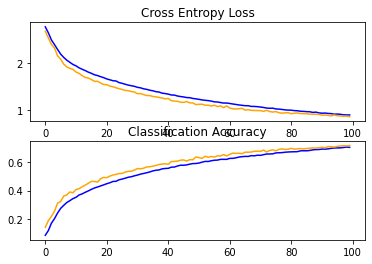

In [23]:
# entry point, run the test harness
run_test_harness()

In [ ]:
# much better!!!

In [24]:
from keras.regularizers import l2

# define cnn model
def define_model_weight_decay():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(16, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [25]:
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model_weight_decay()
 	# prepare iterator
	datagen = ImageDataGenerator()
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] /256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Epoch 1/100
175/175 [==============================] - 6s 32ms/step - loss: 3.5964 - accuracy: 0.2165 - val_loss: 3.2988 - val_accuracy: 0.3136
Epoch 2/100
175/175 [==============================] - 5s 28ms/step - loss: 3.1843 - accuracy: 0.3400 - val_loss: 3.0976 - val_accuracy: 0.3441
Epoch 3/100
175/175 [==============================] - 5s 30ms/step - loss: 3.0148 - accuracy: 0.3872 - val_loss: 2.9572 - val_accuracy: 0.4051
Epoch 4/100
175/175 [==============================] - 6s 32ms/step - loss: 2.8978 - accuracy: 0.4260 - val_loss: 2.9048 - val_accuracy: 0.4169
Epoch 5/100
175/175 [==============================] - 5s 29ms/step - loss: 2.8178 - accuracy: 0.4478 - val_loss: 2.7793 - val_accuracy: 0.4563
Epoch 6/100
175/175 [==============================] - 5s 30ms/step - loss: 2.7401 - accuracy: 0.4695 - val_loss: 2.7596 - val_accuracy: 0.4632
Epoch 7/100
175/175 [==============================] - 5s 27ms/step - loss: 2.6722 - accuracy: 0.4918 - val_loss: 2.6659 - val_accuracy:

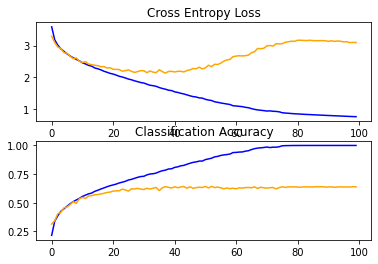

In [26]:
# entry point, run the test harness
run_test_harness()

In [ ]:
# using data augmentation 

In [27]:
# no changes in model needed
def define_model_augmentation():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(16, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [28]:

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model_augmentation()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] / 256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)	# evaluate model
	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)



Epoch 1/100
175/175 [==============================] - 21s 113ms/step - loss: 2.4525 - accuracy: 0.1975 - val_loss: 2.2010 - val_accuracy: 0.2771
Epoch 2/100
175/175 [==============================] - 19s 107ms/step - loss: 2.1465 - accuracy: 0.3041 - val_loss: 1.9595 - val_accuracy: 0.3691
Epoch 3/100
175/175 [==============================] - 19s 107ms/step - loss: 1.9906 - accuracy: 0.3507 - val_loss: 1.8987 - val_accuracy: 0.3755
Epoch 4/100
175/175 [==============================] - 19s 107ms/step - loss: 1.8696 - accuracy: 0.3899 - val_loss: 1.7234 - val_accuracy: 0.4323
Epoch 5/100
175/175 [==============================] - 19s 107ms/step - loss: 1.7917 - accuracy: 0.4131 - val_loss: 1.6831 - val_accuracy: 0.4481
Epoch 6/100
175/175 [==============================] - 20s 113ms/step - loss: 1.7462 - accuracy: 0.4246 - val_loss: 1.6093 - val_accuracy: 0.4681
Epoch 7/100
175/175 [==============================] - 19s 107ms/step - loss: 1.6793 - accuracy: 0.4477 - val_loss: 1.5908 -

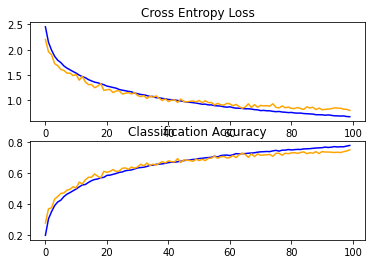

In [29]:
# entry point, run the test harness
run_test_harness()

In [31]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(16, activation='softmax'))
 	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [30]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=256)
	# fit model
	steps = int(trainX.shape[0] /256)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(validationX, vlidationY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

In [ ]:
# entry point, run the test harness
run_test_harness()

Epoch 1/100
175/175 [==============================] - 21s 112ms/step - loss: 3.1576 - accuracy: 0.1524 - val_loss: 2.7440 - val_accuracy: 0.1417
Epoch 2/100
175/175 [==============================] - 19s 109ms/step - loss: 2.5034 - accuracy: 0.2402 - val_loss: 2.2876 - val_accuracy: 0.2456
Epoch 3/100
175/175 [==============================] - 21s 118ms/step - loss: 2.3130 - accuracy: 0.2745 - val_loss: 1.9821 - val_accuracy: 0.3468
Epoch 4/100
175/175 [==============================] - 20s 113ms/step - loss: 2.2065 - accuracy: 0.2987 - val_loss: 1.9060 - val_accuracy: 0.3789
Epoch 5/100
175/175 [==============================] - 20s 111ms/step - loss: 2.1175 - accuracy: 0.3184 - val_loss: 1.8712 - val_accuracy: 0.3912
Epoch 6/100
175/175 [==============================] - 20s 114ms/step - loss: 2.0488 - accuracy: 0.3356 - val_loss: 1.8473 - val_accuracy: 0.3952
Epoch 7/100
  1/175 [..............................] - ETA: 22s - loss: 1.9636 - accuracy: 0.3672